# **Image Preprocessing with OpenCV**

This notebook demonstrates various image processing techniques using Python libraries like `OpenCV`, `NumPy`, and `Matplotlib`. It includes examples of resizing, padding, normalization, flipping, rotating, cropping, random erasing, sharpening, and color distortion. Below is a brief overview of each section:

## **Setup and Installation**  

Install the required libraries: `matplotlib`, `numpy`, and `pillow`.

In [1]:
!pip install opencv-python numpy matplotlib

Download a sample image for demonstration purposes.

In [2]:
!wget -O sample.jpg https://cdn.pixabay.com/photo/2024/02/28/07/42/european-shorthair-8601492_640.jpg

--2024-10-15 20:07:52--  https://cdn.pixabay.com/photo/2024/02/28/07/42/european-shorthair-8601492_640.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43410 (42K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  42.39K   131KB/s    in 0.3s    

2024-10-15 20:07:53 (131 KB/s) - ‘sample.jpg’ saved [43410/43410]



## **Import Libraries**  

Import necessary modules and define utility functions for displaying images, converting between image and array formats, and loading images.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

## **Display and Convert Functions**  

Define helper functions to display multiple images, convert images to NumPy arrays, and vice versa.

In [4]:
# Display images function
def display_images(images: list, titles: list):
    n = len(images)
    if n > 1:
        cols = 3 if (n % 3) == 0 else 2  # Number of columns for the subplot
        rows = (n + cols - 1) // cols  # Calculate the number of rows needed
    else:
        cols = 1
        rows = 1
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5 * rows))
    
    if n == 1:
        axes.imshow(images[0][..., ::-1])
        axes.set_title(titles[0])
        axes.axis('off')
    else:
        axes = axes.flatten()  # Flatten the axes array for easy indexing

        for i in range(n):
            axes[i].imshow(images[i][..., ::-1])
            axes[i].set_title(titles[i])
            axes[i].axis('off')

        # Hide any unused subplots
        for j in range(n, rows * cols):
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()


# Convert NumPy array back to OpenCV image
def array_to_image(array):
    array = np.clip(array * 255, 0, 255).astype(np.uint8)
    return array

## **Load and Display Image**  

Load the downloaded image and display it.

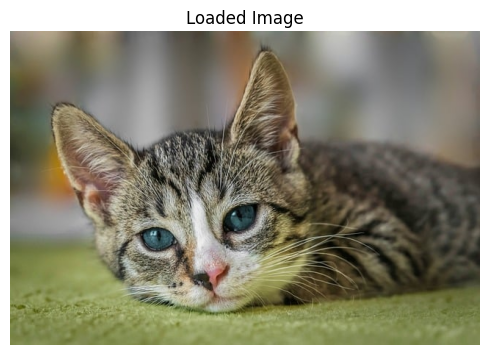

In [5]:
# Load the image
def load_image(image_path):
    return cv2.imread(image_path)

image_path = 'sample.jpg' 
image = load_image(image_path)
display_images([image], ['Loaded Image'])

## **Image Resizing**

### **Direct Resizing**  

Resize the image directly to a specified size.

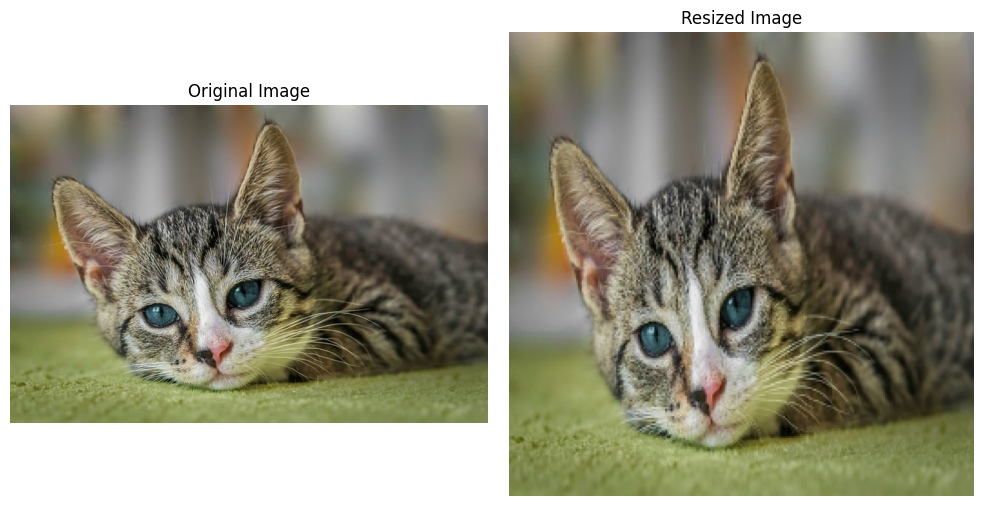

In [6]:
# Direct Resizing
def direct_resize(image, size=(256, 256)):
    return cv2.resize(image, size)

# Example usage of direct resizing
resized_image = direct_resize(image, size=(256, 256))

# Display original and resized images
display_images([image, resized_image], ['Original Image', 'Resized Image'])

### **Resizing with Padding**  

Resize the image with padding to maintain aspect ratio.

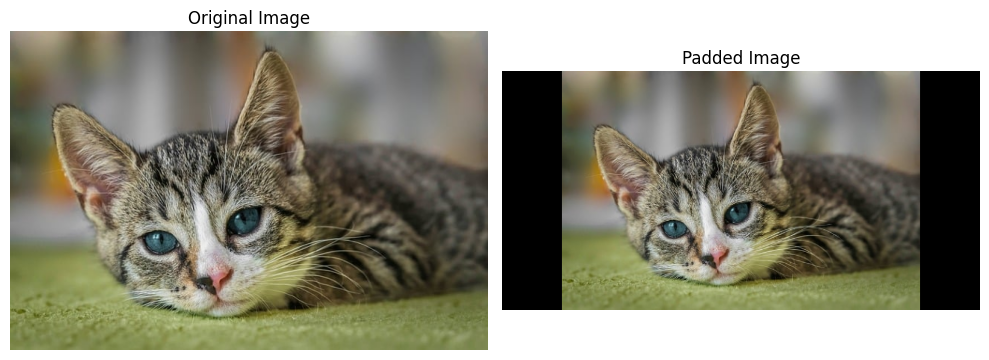

In [7]:
# Resizing with Padding
def resize_with_padding(image, target_size=(256, 256)):
    # Calculate the aspect ratio of the original image
    original_height, original_width = image.shape[:2]
    original_aspect = original_width / original_height
    target_aspect = target_size[0] / target_size[1]

    if original_aspect > target_aspect:
        # Image is wider than target aspect ratio
        new_height = target_size[1]
        new_width = int(new_height * original_aspect)
    else:
        # Image is taller than target aspect ratio
        new_width = target_size[0]
        new_height = int(new_width / original_aspect)

    # Resize the image with the new dimensions
    image = cv2.resize(image, (new_width, new_height))

    vertical_padding = abs((target_size[1] - new_height) // 2)
    horizontal_padding = abs((target_size[0] - new_width) // 2)
    
    # Add the padding with black color (0 value)
    padded_image = cv2.copyMakeBorder(image, vertical_padding, vertical_padding, horizontal_padding, horizontal_padding, cv2.BORDER_CONSTANT, value=0)

    return padded_image


# Example usage of resizing with padding
padded_image = resize_with_padding(image, target_size=(256, 256))

# Display original and padded images
display_images([image, padded_image], ['Original Image', 'Padded Image'])

## **Image Normalization**

### **Min-Max Scaling Normalization**  

Normalize the image pixel values to a range of 0 to 1 using min-max scaling.

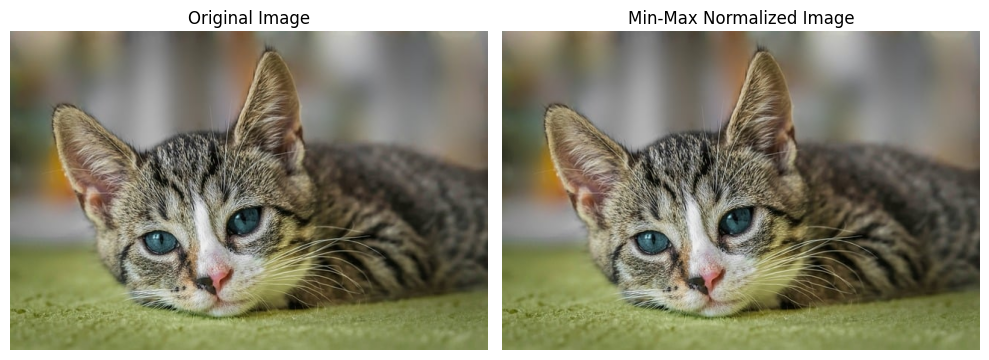

In [8]:
# Min-Max Scaling Normalization
def min_max_scaling(image_array):
    min_val = np.min(image_array)
    max_val = np.max(image_array)
    normalized = (image_array - min_val) / (max_val - min_val)
    return normalized

# Example usage of min-max scaling normalization
image_array = np.array(image)
normalized_image = min_max_scaling(image_array)
min_max_normalized_image = array_to_image(normalized_image)

# Display original and normalized images
display_images([image, min_max_normalized_image], ['Original Image', 'Min-Max Normalized Image'])

### **Z-Score Normalization**  

Apply Z-score normalization to adjust the pixel values based on mean and standard deviation.

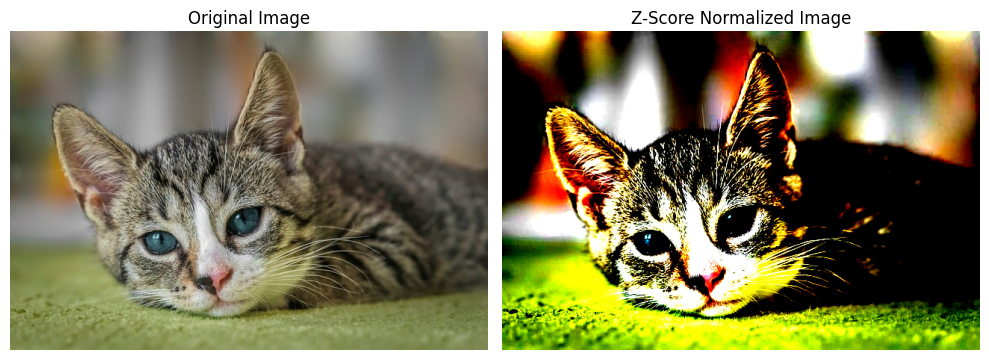

In [9]:
# Z-Score Normalization
def z_score_normalization(image_array):
    mean = np.mean(image_array)
    std = np.std(image_array)
    normalized = (image_array - mean) / std
    return normalized


# Example usage of z-score normalization
image_array = np.array(image)
normalized_image = z_score_normalization(image_array)
z_score_normalized_image = array_to_image(normalized_image)

# Display original and normalized images
display_images([image, z_score_normalized_image], ['Original Image', 'Z-Score Normalized Image'])

## **Image Augmentation**

### **Flipping the Image**  

Flip the image horizontally or vertically using `ImageOps`.

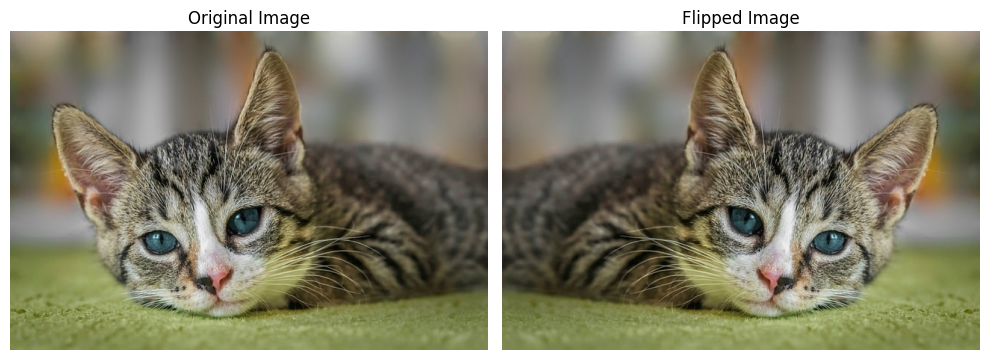

In [10]:
# Flip the image
import cv2

def flip_image(image, mode='horizontal'):
    if mode == 'horizontal':
        return cv2.flip(image, 1)  # 1 for horizontal flip
    elif mode == 'vertical':
        return cv2.flip(image, 0)  # 0 for vertical flip
    return image

# Example usage of flipping the image
flipped_image = flip_image(image, mode='horizontal')

# Display original and flipped images
display_images([image, flipped_image], ['Original Image', 'Flipped Image'])

### **Rotating the Image**  
 
Rotate the image by a specified angle.

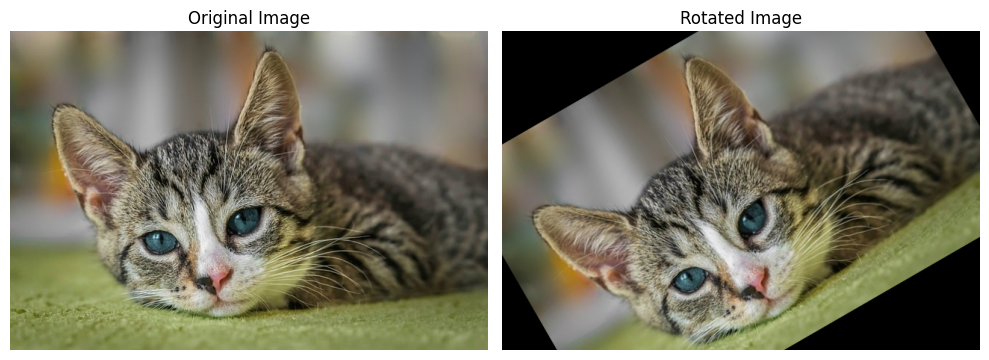

In [11]:
# Rotate the image
def rotate_image(image, angle=30):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

# Example usage of rotating the image
rotated_image = rotate_image(image, angle=30)

# Display original and rotated images
display_images([image, rotated_image], ['Original Image', 'Rotated Image'])

### **Cropping the Image**  
 
Crop the image to a specified size either at the center or randomly.

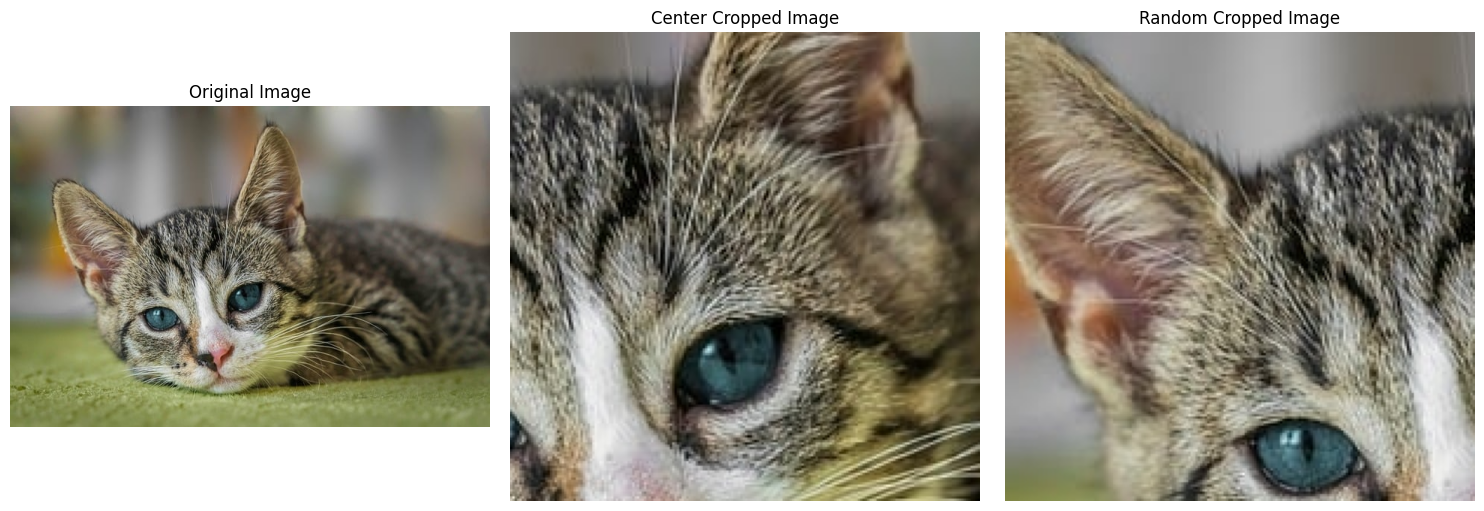

In [12]:
# Crop the image (center or random)
def crop_image(image, crop_size=(200, 200), random_crop=False):
    height, width = image.shape[:2]
    crop_width, crop_height = crop_size

    if random_crop:
        left = random.randint(0, width - crop_width)
        upper = random.randint(0, height - crop_height)
    else:  # Center crop
        left = (width - crop_width) // 2
        upper = (height - crop_height) // 2

    right = left + crop_width
    lower = upper + crop_height
    return image[upper:lower, left:right]

# Example usage of cropping the image
center_cropped_image = crop_image(image, crop_size=(200, 200), random_crop=False)
random_cropped_image = crop_image(image, crop_size=(200, 200), random_crop=True)

# Display original and cropped images
display_images([image, center_cropped_image, random_cropped_image],
               ['Original Image', 'Center Cropped Image', 'Random Cropped Image'])

### **Random Erasing**  
 
Apply random erasing to the image by replacing a random rectangular region with random pixel values.

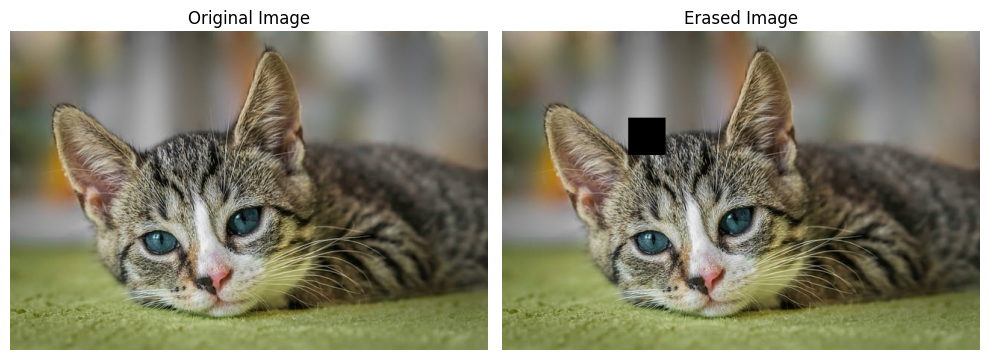

In [13]:
# Random Erasing
def random_erasing(image, erase_size=(50, 50)):
    h, w = image.shape[:2]
    erase_h, erase_w = erase_size

    x = random.randint(0, w - erase_w)
    y = random.randint(0, h - erase_h)

    image_array[y:y+erase_h, x:x+erase_w] = 0
    return image_array

# Example usage of random erasing
erased_image = random_erasing(image, erase_size=(50, 50))

# Display original and erased images
display_images([image, erased_image], ['Original Image', 'Erased Image'])

### **Sharpening the Image**  
 
Enhance the sharpness of the image using `ImageEnhance.Sharpness`.

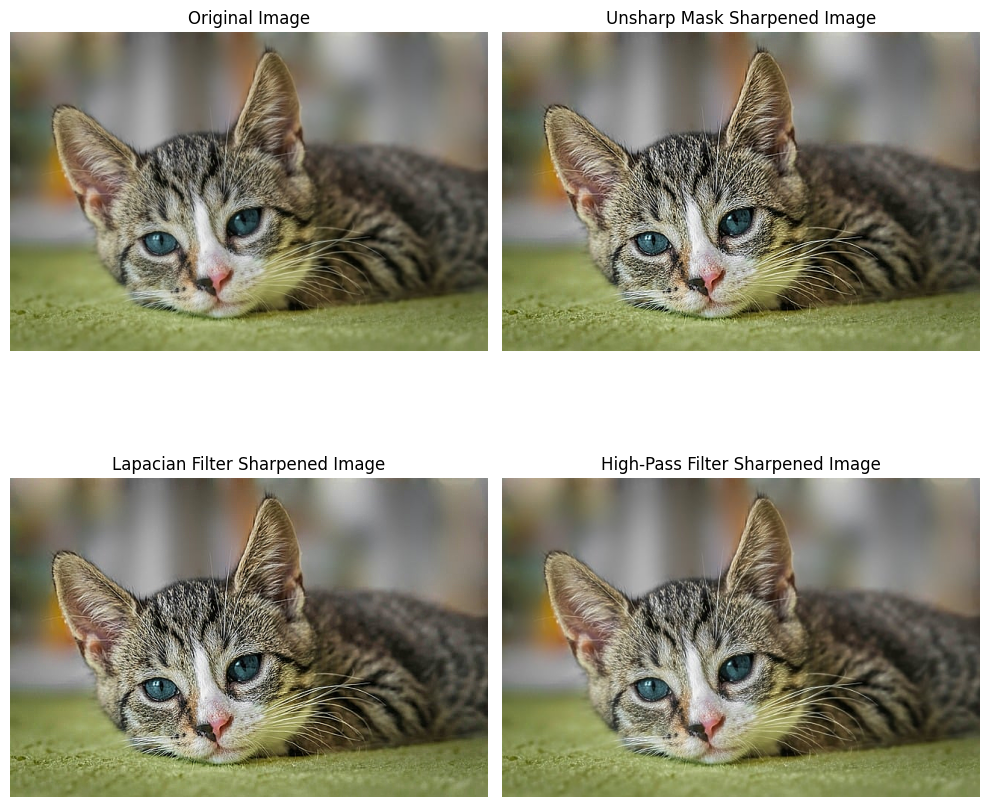

In [14]:
import cv2

# Sharpen the image using unsharp_mask
def unsharp_mask(image, sigma=1.0, strength=1.5):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    # Subtract the blurred image from the original
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

# Sharpen the image using lapacian filter
def lapacian_filter(image, sigma=1.0, strength=1.5, kernel_size=(5, 5)):
    # Apply Gaussian blur with specified kernel size
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    # Subtract the blurred image from the original
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

# Sharpen the image using high-pass filter
def high_pass_filter(image, sigma=1.0):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    # Subtract the blurred image from the original
    high_pass = cv2.subtract(image, blurred)
    # Add the high-pass image back to the original
    sharpened = cv2.addWeighted(image, 1.0, high_pass, 1.0, 0)
    return sharpened

# Example usage of sharpening the image
unsharp_sharpened_image = unsharp_mask(image, sigma=1.0, strength=1.5)
lapacian_sharpened_image = lapacian_filter(image, sigma=1.0, strength=1.5, kernel_size=(5, 5))
high_pass_sharpened_image = high_pass_filter(image, sigma=1.0)


# Display original and sharpened images
display_images([image, unsharp_sharpened_image, lapacian_sharpened_image, high_pass_sharpened_image],
               ['Original Image', 'Unsharp Mask Sharpened Image', 'Lapacian Filter Sharpened Image', 'High-Pass Filter Sharpened Image'])

### **Color Distortion**  
 
# Adjust the RGB channels of the image to create a color distortion effect.

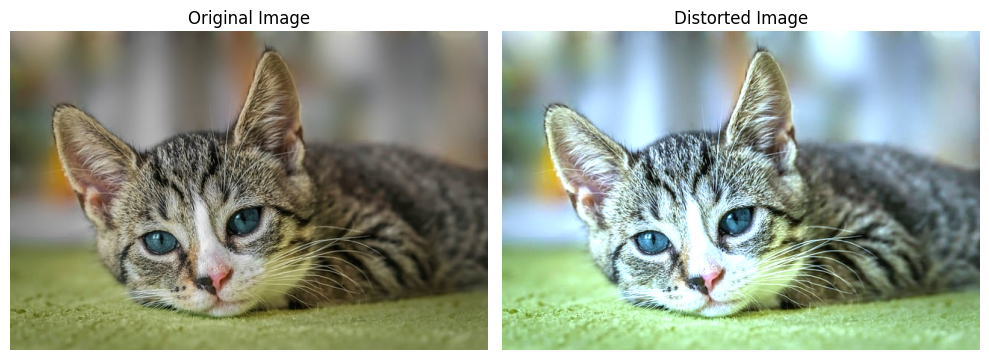

In [15]:
# Color distortion (adjust RGB channels)
def color_distortion(image, r_factor=1.5, g_factor=1.5, b_factor=1.5):
    # Split the image into BGR channels
    b, g, r = cv2.split(image)
    
    # Adjust each channel
    r = cv2.convertScaleAbs(r, alpha=r_factor, beta=0)
    g = cv2.convertScaleAbs(g, alpha=g_factor, beta=0)
    b = cv2.convertScaleAbs(b, alpha=b_factor, beta=0)
    
    # Merge the channels back
    return cv2.merge((b, g, r))

# Example usage of color distortion
distorted_image = color_distortion(image, r_factor=1.25, g_factor=1.5, b_factor=1.75)

# Display original and distorted images
display_images([image, distorted_image], ['Original Image', 'Distorted Image'])